In [69]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from common.enums.enum import ValueType, ObjectSize, GateTypes, TemplateTypes, ObjectRotation
from map.map import Map
from scenario.scenario import Scenario
import random
import numpy as np
from templates.abstract_template import AbstractTemplate
from common.constants.constants import DEFAULT_PLAYER


In [5]:
from yaml import load, SafeLoader, UnsafeLoader

In [2]:
import yaml

In [82]:
base = r"C:\Users\josep\OneDrive\Documents\GitHub\AOE2_Map_Generator\templates\example_templates"

In [98]:
with open(f"{base}\\testing.yaml", 'r') as f:
    data = yaml.load(f, Loader = UnsafeLoader)

ConstructorError: while constructing a Python object
cannot find 'place_groups' in the module 'units.placers.objectplacer'
  in "C:\Users\josep\OneDrive\Documents\GitHub\AOE2_Map_Generator\templates\example_templates\testing.yaml", line 1, column 1

In [28]:
class foo():

    def cool_func(words):
        print(words)

In [29]:
f = foo()

In [97]:
with open(f'{base}\\testing.yaml', 'w') as f:
    data = yaml.dump(func)
    f.write(data)

In [ ]:
input_name = "1 vs 7 DEFAULT.aoe2scenario"
output_name = "0_BASIC_SCENARIO.aoe2scenario"

In [ ]:
map_size = 220
map = Map(map_size)
map.voronoi(50)

map.add_borders_all(
    [ValueType.UNIT, ValueType.TERRAIN, ValueType.DECOR],
    TerrainId.ROAD_FUNGUS,
    margin = 1
    )

castle_array = [BuildingInfo.CASTLE] + [UnitInfo.TEUTONIC_KNIGHT, UnitInfo.PALADIN]*40

def distance(p1,p2):
    return sum(((a-b)**2 for a, b in zip(p1, p2)))

def clumping_func(p1, p2, clumping):
    return np.math.log((1+distance(p1,p2)),16) + random.random()*clumping


In [ ]:
player_two_zone = list(range(-8,-1))
players = list(range(2,9))
d = dict(zip(player_two_zone,players))
for i in range(-500,0):
    pid = PlayerId.ONE

    if i in player_two_zone:
        pid = PlayerId(d[i])
        map.add_borders(ValueType.UNIT, i, BuildingInfo.FORTIFIED_WALL, 1, pid)
        map.place_gate_on_four_sides(
            [ValueType.UNIT, ValueType.ZONE],
            [(BuildingInfo.FORTIFIED_WALL, pid), i], 
            GateTypes.FORTIFIED_GATE, 
            player_id = pid,
            place_on_n_maps = 1,
            )
        
    
    
    map.place_groups([ValueType.UNIT, ValueType.TERRAIN], [i,i], TerrainId.WATER_DEEP, groups = 1, group_size = 31,  clumping = 1, place_on_n_maps=2)
    map.place_groups([ValueType.UNIT, ValueType.ZONE], [(TerrainId.WATER_DEEP,PlayerId.GAIA), i], OtherInfo.SHORE_FISH, groups = 1, group_size = 3,  clumping = 1)


    map.place_groups(ValueType.UNIT, i, OtherInfo.TREE_OAK_FOREST, groups = 1, group_size = 175,  clumping = 999)
    map.place_groups(ValueType.UNIT, i, OtherInfo.TREE_OAK_FOREST, groups = 5, group_size = 30,  clumping = 0)
    map.place_groups(ValueType.UNIT, i, OtherInfo.TREE_OAK_FOREST, groups = 15, group_size = 3,  clumping = 0)


    map.place_groups(ValueType.UNIT, i, UnitInfo.DEER, group_size = 7, groups = 1, clumping = 1)
    map.place_groups(ValueType.UNIT, i, OtherInfo.ROMAN_RUINS, group_size = 1, groups = 3, clumping = 3)
    map.place_groups(ValueType.UNIT, i, OtherInfo.FORAGE_BUSH, group_size = 5, groups = 2, clumping = 2)
    map.place_groups(ValueType.UNIT, i, OtherInfo.GOLD_MINE, group_size = 5, groups = 2, clumping = 2)
    map.place_groups(ValueType.UNIT, i, OtherInfo.STONE_MINE, group_size = 5, groups = 2, clumping = 2)

    map.place_groups(ValueType.UNIT, i, OtherInfo.GRASS_PATCH_GREEN, group_size = 5, groups = 2, clumping = 5)
    map.place_groups(ValueType.UNIT, i, OtherInfo.FLOWER_BED, group_size = 1, groups = 3, clumping = 10)
    map.place_groups(ValueType.UNIT, i, OtherInfo.FLOWERS_1, group_size = 1, groups = 2, clumping = 10)
    map.place_groups(ValueType.UNIT, i, OtherInfo.FLOWERS_2, group_size = 1, groups = 2, clumping = 10)
    map.place_groups(ValueType.UNIT, i, OtherInfo.FLOWERS_3, group_size = 1, groups = 2, clumping = 10)

    map.place_groups(ValueType.UNIT, i, 
    [BuildingInfo.TOWN_CENTER, BuildingInfo.FARM,BuildingInfo.FARM,BuildingInfo.FARM,BuildingInfo.FARM,UnitInfo.VILLAGER_FEMALE,UnitInfo.VILLAGER_MALE],
     pid, margin = 0, group_size = 5, groups = 1, clumping = 0
    )
    map.place_groups(ValueType.UNIT, i, castle_array, pid, margin = 0, group_size = 17, groups = 1, clumping = 10)


    map.place_groups(ValueType.UNIT, i, OtherInfo.BURNED_BUILDING, margin = 0, group_size = 1, groups = 1, clumping = 25)
    map.place_groups(ValueType.UNIT, i, BuildingInfo.BARRACKS, pid, margin = 1, group_size = 1, groups = 1, clumping = 25)
    map.place_groups(ValueType.UNIT, i, UnitInfo.SIEGE_RAM, pid, margin = 1, group_size = 2, groups = 1, clumping = 25)
    map.place_groups(ValueType.UNIT, i, [BuildingInfo.ARCHERY_RANGE, UnitInfo.CROSSBOWMAN], pid, margin = 0, group_size = 16, groups = 1, clumping = 5)
    map.place_groups(ValueType.UNIT, i, [BuildingInfo.STABLE, UnitInfo.HUSSAR], pid, margin = 0, group_size = 17, groups = 1, clumping = 10)

    map.place_groups(ValueType.UNIT, i, BuildingInfo.HOUSE, pid, margin = 1, ghost_margin=False, group_size = 5, groups = 1, clumping = 10)

    map.place_groups(ValueType.UNIT, i, OtherInfo.TREE_OAK_FOREST, group_size = 50, groups = 1, clumping = 999)

    if i in player_two_zone:
        map.place_groups(ValueType.UNIT, i, UnitInfo.HEAVY_PIKEMAN, pid, margin = 0, group_size = 16, groups = 3, clumping = 10)
        map.place_groups(ValueType.UNIT, i, [BuildingInfo.DONJON, UnitInfo.MAN_AT_ARMS], pid, margin = 0, group_size = 69, groups = 3, clumping = 10)
        map.place_groups(ValueType.UNIT, i, [BuildingInfo.FORTRESS, UnitInfo.CRUSADER_KNIGHT], pid, margin = 0, group_size = 69, groups = 1, clumping = 10)
        map.place_groups(ValueType.UNIT, i, [BuildingInfo.BOMBARD_TOWER, UnitInfo.LONGBOWMAN], pid, margin = 1, group_size = 10, groups = 4, clumping = 2)
        map.place_groups(ValueType.UNIT, i, UnitInfo.VILLAGER_FEMALE, pid, margin = 0, group_size = 5, groups = 2, clumping = 1)

map.place_groups(ValueType.UNIT, (TerrainId.ROAD_FUNGUS, PlayerId.GAIA), [UnitInfo.LEGIONARY, UnitInfo.ELITE_CATAPHRACT]*5, PlayerId.ONE, group_size = 10, groups = 50, clumping = 2)

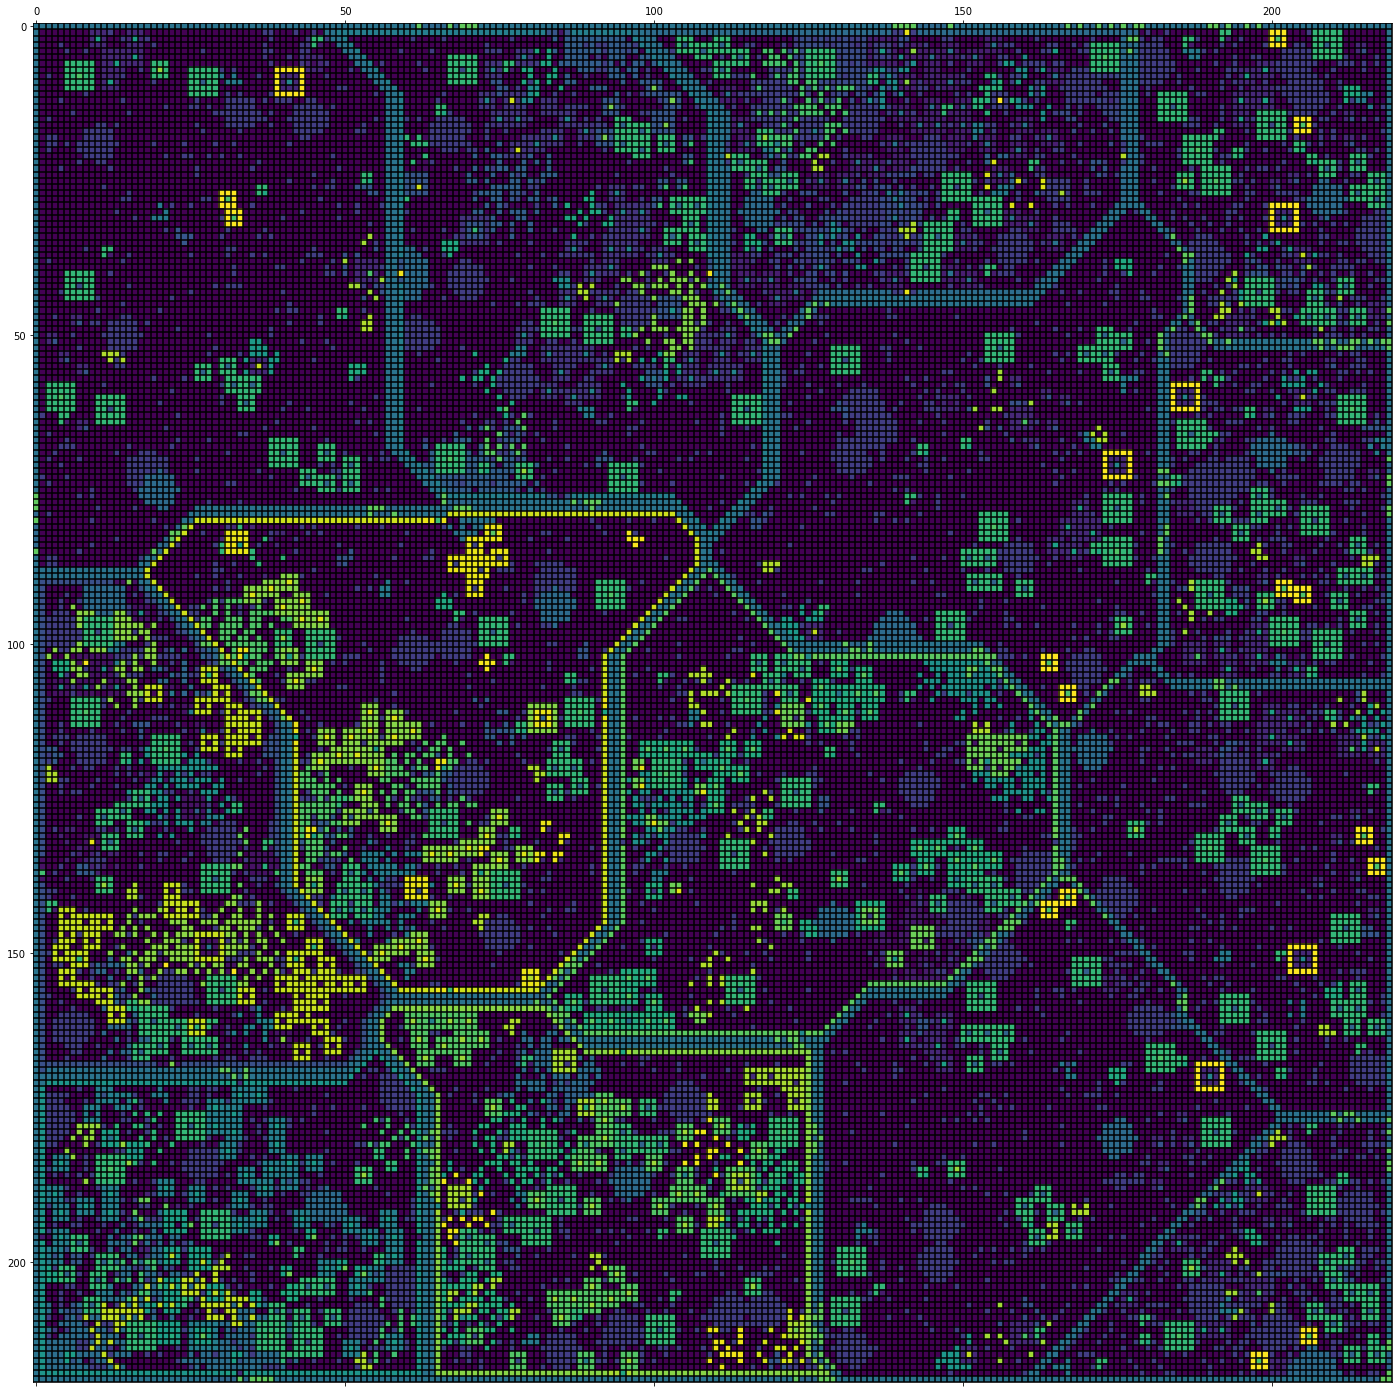

In [ ]:
map.visualize_mat(ValueType.UNIT, include_zones=False)

In [ ]:
scenario = Scenario(input_name, map)


Reading file: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\1 vs 7 DEFAULT.aoe2scenario'
Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.46
##########################################

Loading scenario structure finished successfully.
Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
Parsing scenario file finished successfully.

Setting up managers ...
	✔ PlayerManagerrManager...
	✔ MapManagerpManager...
	✔ UnitManagertManager...
	✔ TriggerManagerrManager...
	✔ XsManagersManager...
Setting up managers finished successfully.


In [ ]:
scenario.change_map_size(map_size)
scenario.write_map()
scenario.save_file(output_name)


Reconstructing sections and structs from managers...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
Reconstruction finished successfully.

File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
File writing finished successfully.
File successfully written to: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\0_BASIC_SCENARIO.aoe2scenario'
